In [10]:
import sys
from pathlib import Path
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt

# 1. Configuration des chemins
ROOT_DIR = Path("..").resolve()
sys.path.append(str(ROOT_DIR))

# 2. Autoreload (Pour que les modifs dans .py soient prises en compte)
%load_ext autoreload
%autoreload 2

# 3. Imports de nos modules
from src.audio_processing import AudioProcessor

print(f"Racine du projet : {ROOT_DIR}")

# Instanciation des outils
processor = AudioProcessor(root_dir=ROOT_DIR)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Racine du projet : C:\Users\benic\Documents\Projet_DL_Translation


In [7]:
# On extrait tout le test et le valid
for split in ['valid', 'test']:
    processor.extract_and_segment(split=split, limit=None)

--- Extraction Audio pour VALID (12 vidéos) ---


Segmentation valid: 100%|██████████| 12/12 [07:49<00:00, 39.11s/it]


--- Extraction Audio pour TEST (10 vidéos) ---


Segmentation test: 100%|██████████| 10/10 [08:33<00:00, 51.38s/it]


In [8]:
print("--- 🎧 Traitement et Audibilité (Split : VALID) ---")

valid_csv = ROOT_DIR / "data" / "processed" / "valid_asr_fr.csv"
if valid_csv.exists():
    df_valid = pd.read_csv(valid_csv).sample(3) # On prend 3 sons au hasard
    
    for _, row in df_valid.iterrows():
        seg_id = row['segment_id']
        seg_path = ROOT_DIR / "data" / "processed" / "segments" / "valid" / f"{seg_id}.wav"
        
        if seg_path.exists():
            print(f"\n🔹 Segment : {seg_id} | Durée : {row['end_time'] - row['start_time']:.1f}s")
            print(f"   Texte Cible : {row['text_fr']}")
            ipd.display(ipd.Audio(filename=seg_path))
else:
    print("CSV de validation introuvable.")

--- 🎧 Traitement et Audibilité (Split : VALID) ---

🔹 Segment : ZoZmlhlwFEA_0071 | Durée : 3.2s
   Texte Cible : Aujourd'hui, ça devient une barrière, car j'ai peur de jouer devant vous.



🔹 Segment : cnJANkJSxlg_0052 | Durée : 7.5s
   Texte Cible : Donc je me retourne, je commence à avancer, j'arrive au milieu, et j'entends en fait au loin un crissement de pneus.



🔹 Segment : cnJANkJSxlg_0096 | Durée : 1.1s
   Texte Cible : Là, j'ai dit : « C'est important. »


--- 📊 Bilan Volumétrique de l'Audio à Transcrire ---
Total Heures Audio à évaluer : 1.81 h


,Split,Segments,Heures
0,VALID,1036,1.808514


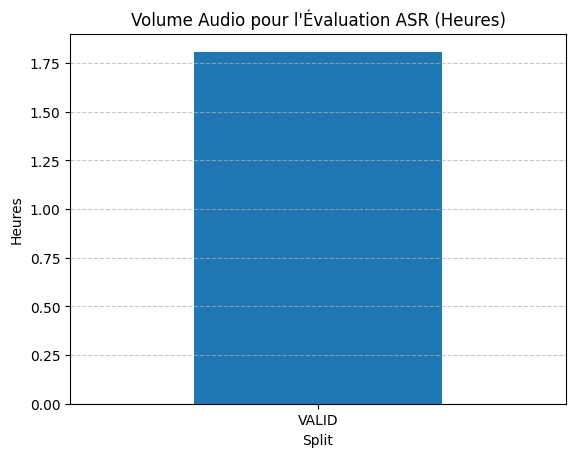

In [12]:
splits_eval = ['valid']
total_hours = 0
stats = []

print("--- 📊 Bilan Volumétrique de l'Audio à Transcrire ---")

for split in splits_eval:
    csv_path = ROOT_DIR / "data" / "processed" / f"{split}_asr_fr.csv"
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        # Calcul de la durée en heures
        duration_h = (df['end_time'] - df['start_time']).sum() / 3600
        count = len(df)
        total_hours += duration_h
        stats.append({'Split': split.upper(), 'Segments': count, 'Heures': duration_h})

df_stats = pd.DataFrame(stats)

if not df_stats.empty:
    print(f"Total Heures Audio à évaluer : {total_hours:.2f} h")
    display(df_stats)
    
    # Création d'un beau graphique
    df_stats.set_index('Split')['Heures'].plot(
        kind='bar', 
        title='Volume Audio pour l\'Évaluation ASR (Heures)', 
        color=['#1f77b4', '#ff7f0e'] # Bleu et Orange
    )
    plt.ylabel('Heures')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Aucune donnée volumétrique disponible.")